<a href="https://colab.research.google.com/github/performant23/breast-cancer-prediction-svm/blob/main/Model_Classifying_Breast_Cancer_Cells_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Credit - Breast Cancer Wisconsin (Diagnostic) Data Set (University of California, Irvine)

Access - https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

Alternate Access - https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
# Loading the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
data
data = data.drop(['Unnamed: 32'], axis = 1) # Removing the 'Unnamed: 32' column of invalid values

# Mapping 'M' - Malevolent, 'B' - Benign to 'M' - 1, 'B' - 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X = data.drop(['id', 'diagnosis'], axis = 1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
Y = data['diagnosis']
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
#Checking for missing, negative, or invalid values
missing_values = X.isnull().sum()
zero_values = (X == 0).sum()
negative_values = (X < 0).sum()
invalid_values = pd.concat([missing_values, zero_values, negative_values], axis=1)
invalid_values.columns = ['Missing Values', 'Zero Values', 'Negative Values']
print(invalid_values)

                         Missing Values  Zero Values  Negative Values
radius_mean                           0            0                0
texture_mean                          0            0                0
perimeter_mean                        0            0                0
area_mean                             0            0                0
smoothness_mean                       0            0                0
compactness_mean                      0            0                0
concavity_mean                        0           13                0
concave points_mean                   0           13                0
symmetry_mean                         0            0                0
fractal_dimension_mean                0            0                0
radius_se                             0            0                0
texture_se                            0            0                0
perimeter_se                          0            0                0
area_se             

In [ ]:
# Splitting the dataset into 'train' for training the model and 'test' - to test the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


Now we can get started preprocessing the data

In [ ]:
# Preprocessing the data to have mean - 0 and variance - 1

SSc = StandardScaler()
SSc.fit(X_train)

X_train = SSc.transform(X_train)
X_test = SSc.transform(X_test)


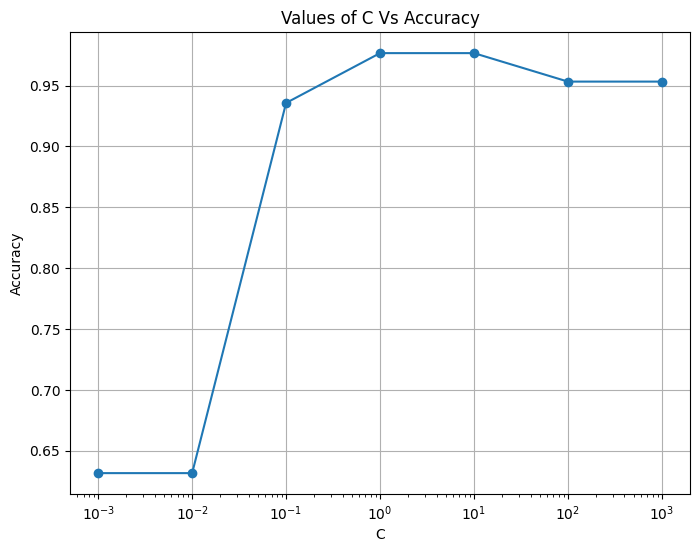

In [ ]:
# Implementing SVM
# We use L2 Regularization (Ridge Regression) to prevent overfitting. We can plot the values of C parameter to find an optimal C.
C_values = np.logspace(-3, 3, num=7)  # Adjust the range as needed
accuracy_values = []

for C in C_values:
    svm = SVC(C=C)
    svm.fit(X_train, Y_train)
    Y_pred = svm.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_values.append(accuracy)


plt.figure(figsize=(8, 6))
plt.plot(C_values, accuracy_values, marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Values of C Vs Accuracy')
plt.grid(True)
plt.show()


The optimal values of C seems to be around 1-10. We can loop through these values for an optimal 'C'

In [ ]:
for x in range(1,11):
    svm = SVC(C=x)
    svm.fit(X_train, Y_train)
    Y_pred = svm.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print("C - ",x, ", Accuracy - ", accuracy)

C -  1 , Accuracy -  0.9766081871345029
C -  2 , Accuracy -  0.9824561403508771
C -  3 , Accuracy -  0.9824561403508771
C -  4 , Accuracy -  0.9766081871345029
C -  5 , Accuracy -  0.9766081871345029
C -  6 , Accuracy -  0.9766081871345029
C -  7 , Accuracy -  0.9766081871345029
C -  8 , Accuracy -  0.9766081871345029
C -  9 , Accuracy -  0.9766081871345029
C -  10 , Accuracy -  0.9766081871345029


Value of 'C' around 3.4 seems to be optimal for this particular split and data

In [ ]:
svm = SVC(C=3.4)
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Optimal Accuracy - ",  accuracy)

Optimal Accuracy -  0.9824561403508771


We can use GridSearch to tune the parameters - kernel type, regularization, and gamma, to get the best parameters for this problem

In [ ]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}


svm = SVC()
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters: ", best_params)
print("Best Model: ", best_model)

Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: ", accuracy)

#Getting Coefficients (since we have linear kernel as optimal choice)
svm = SVC(C = 0.1, gamma = 0.1, kernel = 'linear')
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy - ",  accuracy)
print("Coefficients - ")
print(svm.coef_)

Best Parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Model:  SVC(C=0.1, gamma=0.1, kernel='linear')
Accuracy:  0.9824561403508771
Accuracy -  0.9824561403508771
Coefficients - 
[[ 0.20000035  0.23976906  0.18741459  0.21834901  0.05849942 -0.15842716
   0.33828855  0.43578198  0.00203101 -0.12803568  0.3733334  -0.09053253
   0.28514907  0.27455055  0.11218245 -0.24054837  0.07791831  0.12924897
  -0.18256033 -0.2154      0.28840865  0.48083199  0.24605471  0.26493848
   0.21323024 -0.05146535  0.31458217  0.25644382  0.52055755  0.06332085]]


Using GridSearch to tune the parameters - C, gamma, and kernel seems to be giving almost similar performance to Ridge Regression (L2 Regularization) (though it's dependent on the splits of the data). We can also use Principal Component Analysis to reduce the number of components (considering the best components) and analyzing the effect it has on the accuracy score

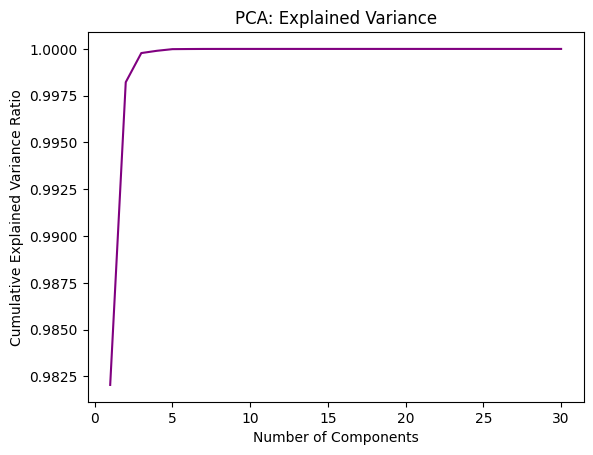

In [ ]:

pca = PCA()
X_pca = pca.fit_transform(X)

# Getting Cumulative Explained Variance Ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color = 'purple')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance')
plt.show()

In [ ]:
# We can loop through the components to check the components that give maximal performance

for z in range(1,31):
    pca = PCA(n_components=z)
    X_pca = pca.fit_transform(X)
    X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)
    svm_pca = SVC(C = 3.4)
    svm_pca.fit(X_train_pca, Y_train)
    Y_pred_pca = svm_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(Y_test, Y_pred_pca)
    print("Accuracy (with ", z, " Components):", accuracy_pca)

Accuracy (with  1  Components): 0.9473684210526315
Accuracy (with  2  Components): 0.9532163742690059
Accuracy (with  3  Components): 0.9473684210526315
Accuracy (with  4  Components): 0.9532163742690059
Accuracy (with  5  Components): 0.9532163742690059
Accuracy (with  6  Components): 0.9532163742690059
Accuracy (with  7  Components): 0.9532163742690059
Accuracy (with  8  Components): 0.9532163742690059
Accuracy (with  9  Components): 0.9532163742690059
Accuracy (with  10  Components): 0.9532163742690059
Accuracy (with  11  Components): 0.9532163742690059
Accuracy (with  12  Components): 0.9532163742690059
Accuracy (with  13  Components): 0.9532163742690059
Accuracy (with  14  Components): 0.9532163742690059
Accuracy (with  15  Components): 0.9532163742690059
Accuracy (with  16  Components): 0.9532163742690059
Accuracy (with  17  Components): 0.9532163742690059
Accuracy (with  18  Components): 0.9532163742690059
Accuracy (with  19  Components): 0.9532163742690059
Accuracy (with  20  C

For this iteration at least, the accuracy of the model with fewer components is worse than the model with all components. This can indicate:
1. Information Loss: We data we have is diagnostic. So, it can be the case that the data which we discarded does contribute (even not as significantly as the principal components) to the boundary between the classes - 0 (Benign) and 1 (Malevolent). So, it can be important to consider all factors before reaching a conclusion in this case.
2. Component Sufficiency: PCA works on getting the best 'x' features to represent the data. But it is possible that these 'x' features itself are not sufficient to describe the classes.

Note:
In this model, the variety and magnitude of data can potentially impace the performance of the model. The data collected has 30 features and 569 instances out of which, the model is trained on about 399 instances. This can be insufficient to generalize the model since the more data the model has, the more 'generalized' it can become. On the other hand, less data can risk overfitting and can fail to generalize and represent all possible data (I am not sure if the feature space is limited/sufficient to represent the distribution of the target variable due to lack of domain knowledge). We have used 'Ridge Regression' to regularize the model in an effort to prevent overfitting
